# HRF Mark 2

In [25]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [26]:
hrf = cv2.imread('/Users/teguhsatya/Dev/segeralulus/samples/s_hrf.jpg')
hrf_rgb = cv2.cvtColor(hrf, cv2.COLOR_BGR2RGB)
hrf_res = cv2.resize(hrf_rgb, (int(hrf_rgb.shape[1]*50/100), int(hrf_rgb.shape[0]*50/100)), cv2.INTER_AREA)

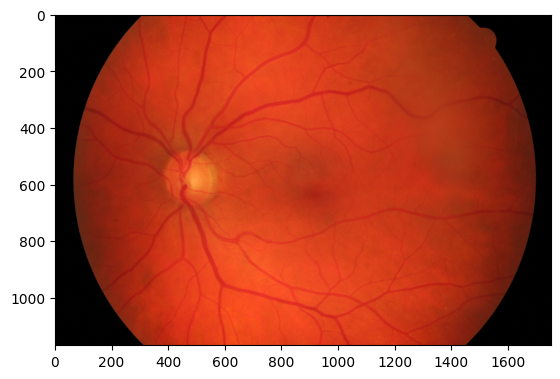

In [27]:
plt.imshow(hrf_res)

In [28]:
lab = cv2.cvtColor(hrf_res, cv2.COLOR_RGB2LAB)

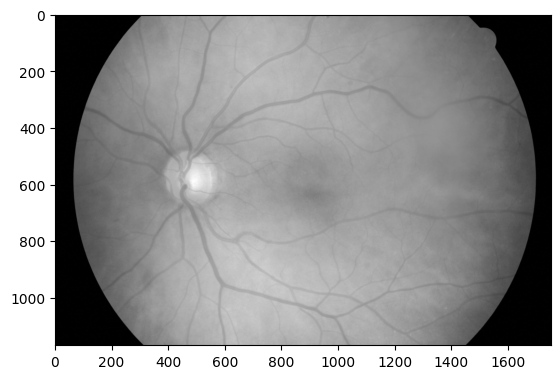

In [29]:
plt.imshow(lab[:,:,0], cmap='gray')

In [33]:
l = lab[:,:,0]

In [36]:
wlim = 135
xmax = cv2.minMaxLoc(l)[3][0]
ymax = cv2.minMaxLoc(l)[3][1]
roi = hrf_res.copy()[ymax-wlim:ymax+wlim,xmax-wlim:xmax+wlim]

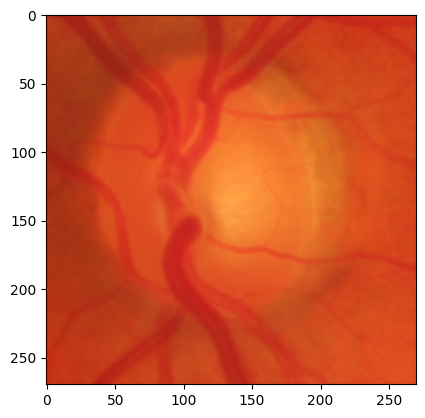

In [37]:
plt.imshow(roi, 'gray')

In [39]:
roilab = cv2.cvtColor(roi.copy(), cv2.COLOR_RGB2LAB)

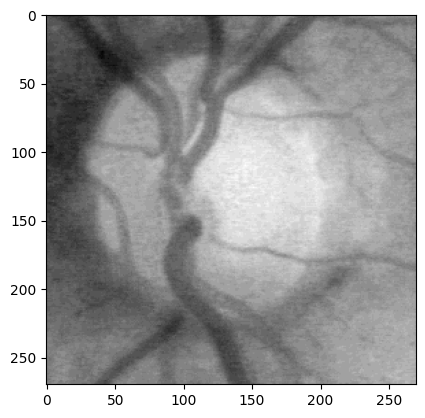

In [45]:
plt.imshow(roilab[:,:,2], 'gray')

In [46]:
roiscnd = roilab[:,:,2]

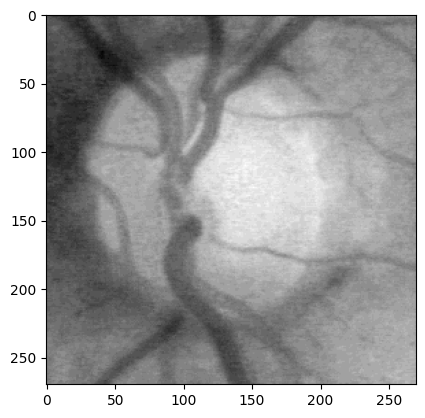

In [47]:
plt.imshow(roiscnd, 'gray')

In [55]:
roiblr = cv2.medianBlur(roiscnd.copy(), 5)

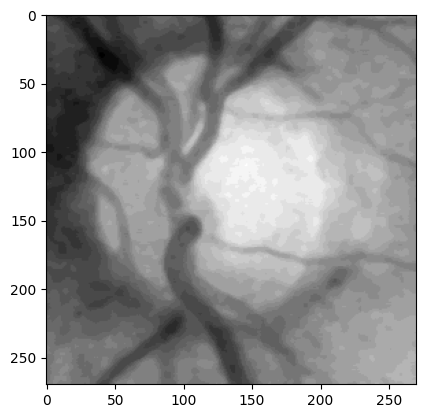

In [56]:
plt.imshow(roiblr, cmap='gray')

In [62]:
kernel_open = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (roiblr.shape[0]//50, roiblr.shape[1]//50))
bukadikit = cv2.morphologyEx(roiblr.copy(), cv2.MORPH_OPEN, kernel_open)

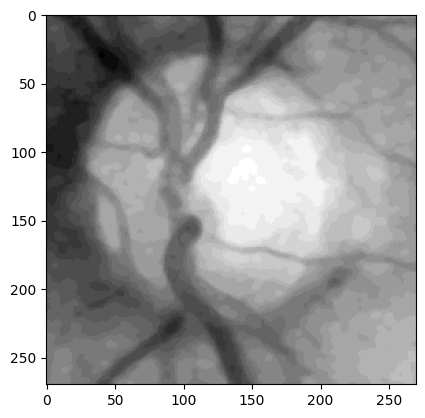

In [63]:
plt.imshow(bukadikit, cmap='gray')

In [64]:
ret4,th4 = cv2.threshold(bukadikit.copy(),0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

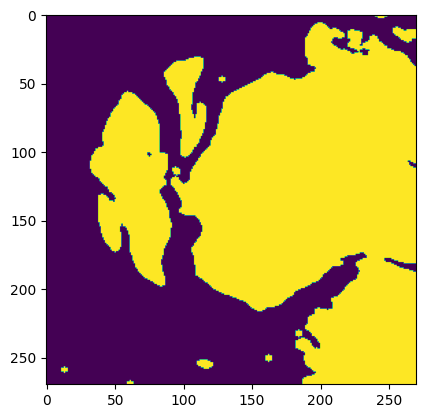

In [65]:
plt.imshow(th4)

# plan 3

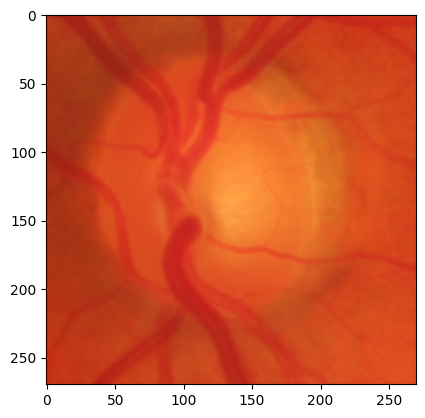

In [71]:
plt.imshow(roi)

In [77]:
labroi = cv2.cvtColor(roi.copy(), cv2.COLOR_RGB2LAB)

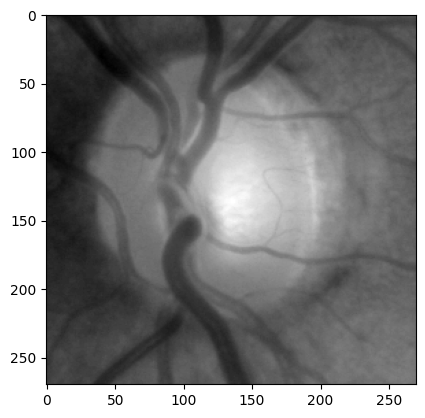

In [78]:
plt.imshow(labroi[:,:,0], cmap='gray')

In [109]:
clahe = cv2.createCLAHE(1.5, (8,8))
labclahe = clahe.apply(labroi[:,:,0])

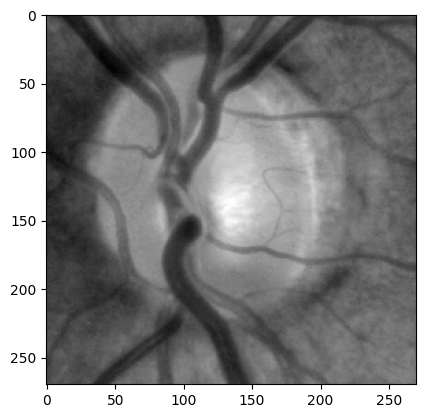

In [110]:
plt.imshow(labclahe, cmap='gray')

In [111]:
labbl = cv2.GaussianBlur(labclahe.copy(), (21,21),0)

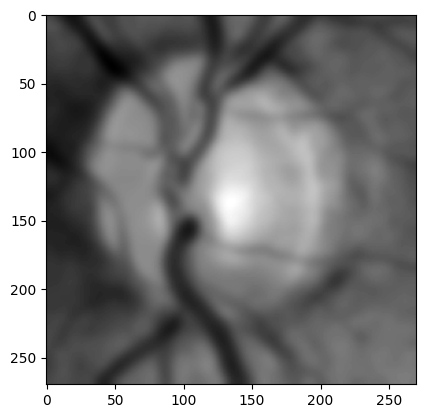

In [112]:
plt.imshow(labbl, cmap='gray')

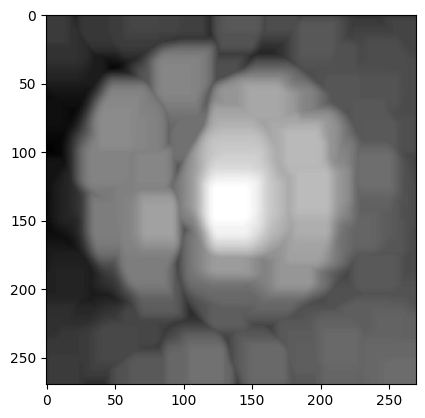

In [113]:
dilate = cv2.dilate(labbl.copy(), kernel=np.ones((19,19), np.uint8)) # was 19,19
plt.imshow(dilate, 'gray')

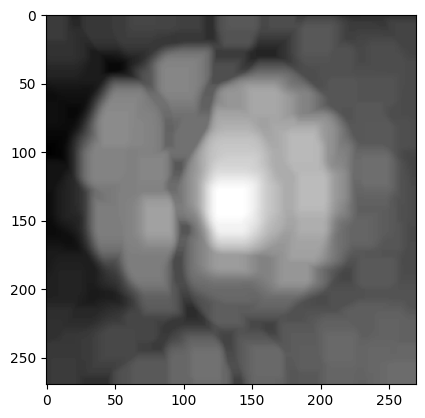

In [114]:
erosion = cv2.erode(dilate.copy(), kernel=np.ones((5,5), np.uint8)) # was 10 10
plt.imshow(erosion, cmap='gray')

In [115]:
ret4,th4 = cv2.threshold(dilate.copy(),0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

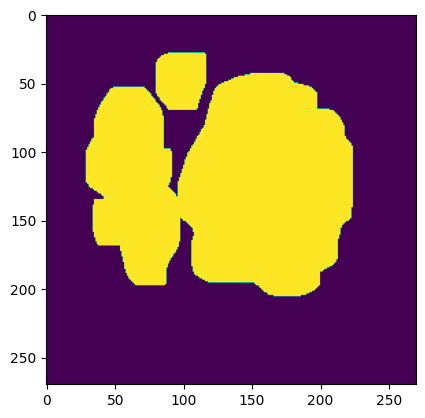

In [116]:
plt.imshow(th4)

In [117]:
cont, hcy = cv2.findContours(th4.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

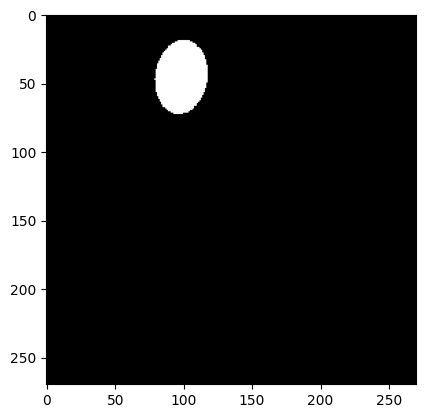

In [118]:
thhh = th4.copy()
roic = roi.copy()
for contour in cont:
    ellipse = cv2.fitEllipse(contour)
    od = np.zeros_like(thhh, dtype='uint8')
    cv2.ellipse(od, ellipse, (255, 255, 255), -1)
    cv2.ellipse(roic, ellipse, (0, 255, 0), 1, cv2.LINE_AA)
    plt.imshow(od, 'gray')